# Challenge: Preparing a dataset for modeling

Using a FIFA 2019 complete player dataset, I select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. I'll explore the variables using the univariate and bivariate methods.

Next, using data exploration, I'll create ten new features and explain the reasoning behind each one.

Finally, I'll use filtering methods to select the five best features and justify my choices.

# 1. Exploratory Data Analysis (EDA)

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as sts
sns.set_style("white") # set the default plot aesthetics to be prettier
import warnings
warnings.filterwarnings('ignore')

## 1.1 Exploring the data: Univariate

In [2]:
# load the dataset 
df = pd.read_csv(r'C:\Users\hafeez_poldz\Desktop\Thinkful\Unit 2\datas\fifa2019.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

The dataset is large. It contains 89 columns (variables) and 18207 entries. I'll take a subset of the data to work with more useful features

In [3]:
# take a subset of the data to make plots clearer
df1 = df.loc[:, ['Club', 'Nationality','Position', 'Age', 'Overall', 'Height', 'Weight', 'Balance', 'SprintSpeed', 'BallControl',
                 'Stamina', 'Aggression','Acceleration', 'ShotPower', 
                 'Agility', 'ShortPassing', 'Body Type']].reset_index(drop = True)


In [4]:
total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Club,241,0.013237
Position,60,0.003295
BallControl,48,0.002636
Height,48,0.002636
Weight,48,0.002636
Balance,48,0.002636
ShortPassing,48,0.002636
Body Type,48,0.002636
Stamina,48,0.002636
Aggression,48,0.002636


Data subset has 18 columns and 18206 entries for each column. There are missing values in this subset and I need some data cleaning.

## 1.2 Data Cleaning & Manipulation

In [5]:
# to deal with missing values, I'll just drop them
df1.dropna(inplace = True)
df1.head()

,Club,Nationality,Position,Age,Overall,Height,Weight,Balance,SprintSpeed,BallControl,Stamina,Aggression,Acceleration,ShotPower,Agility,ShortPassing,Body Type
0,FC Barcelona,Argentina,RF,31,94,5'7,159lbs,95.0,86.0,96.0,72.0,48.0,91.0,85.0,91.0,90.0,Messi
1,Juventus,Portugal,ST,33,94,6'2,183lbs,70.0,91.0,94.0,88.0,63.0,89.0,95.0,87.0,81.0,C. Ronaldo
2,Paris Saint-Germain,Brazil,LW,26,92,5'9,150lbs,84.0,90.0,95.0,81.0,56.0,94.0,80.0,96.0,84.0,Neymar
3,Manchester United,Spain,GK,27,91,6'4,168lbs,43.0,58.0,42.0,43.0,38.0,57.0,31.0,60.0,50.0,Lean
4,Manchester City,Belgium,RCM,27,91,5'11,154lbs,77.0,76.0,91.0,90.0,76.0,78.0,91.0,79.0,92.0,Normal


In [6]:
df1['Body Type'].unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Lean', 'Normal', 'Courtois',
       'Stocky', 'PLAYER_BODY_TYPE_25', 'Shaqiri', 'Akinfenwa'],
      dtype=object)

In [7]:
# clean 'Height', 'Weight' columns and convert them to float
df1['Height'] = df1['Height'].str.replace("'", '.').astype(float)
df1['Weight'] = df1['Weight'].str.replace('lbs', '').astype(float)

# standardize Body Type column 
df1['Body Type'] = df1['Body Type'].str.replace('C. Ronaldo', 'Lean')
df1['Body Type'] = df1['Body Type'].str.replace('Neymar', 'Lean')
df1['Body Type'] = df1['Body Type'].str.replace('Messi', 'Lean')
df1['Body Type'] = df1['Body Type'].str.replace('Courtois', 'Normal')
df1['Body Type'] = df1['Body Type'].str.replace('Shaqiri', 'Stocky')
df1['Body Type'] = df1['Body Type'].str.replace('Akinfenwa', 'Stocky')
df1['Body Type'] = df1['Body Type'].str.replace('PLAYER_BODY_TYPE_25', 'Normal')

df1.dtypes

Club             object
Nationality      object
Position         object
Age               int64
Overall           int64
Height          float64
Weight          float64
Balance         float64
SprintSpeed     float64
BallControl     float64
Stamina         float64
Aggression      float64
Acceleration    float64
ShotPower       float64
Agility         float64
ShortPassing    float64
Body Type        object
dtype: object

In [8]:
# check again for missing values
df1.isnull().sum().max()

0

## 1.3 Exploring the data: Bivariate
Next, I'll examine the pairwise relationships among the data. I already took 11 continious and 3 categorical variables for bivariate relationship analysis. For visual explanation, I'll use scatter plot, kernel density plot and linear regression plot. 
   ### 1.3.1 For all continuous variables:

In [9]:
# to better see all the points, I create a dataframe of random noise and add it only when plotting.
df_jittered = df1.loc[:, 'SprintSpeed':'ShotPower']

# create random noise
noise = pd.DataFrame(np.random.uniform(-0.1, 0.1, size = (df_jittered.shape)), columns = df_jittered.columns)

# combine the data and noise
df_jittered = df_jittered.add(noise)
df_jittered.head()

,SprintSpeed,BallControl,Stamina,Aggression,Acceleration,ShotPower
0,85.989786,96.041972,71.926845,47.947391,91.051157,84.922476
1,90.992642,94.022362,87.911311,63.066954,89.011050,94.908800
2,90.044188,94.969081,80.972374,56.074486,93.919836,80.022901
3,58.066292,41.903530,42.920999,37.962732,57.063613,30.911962
4,75.957990,91.017967,89.993290,75.959861,77.915563,90.988910


<function matplotlib.pyplot.show(*args, **kw)>

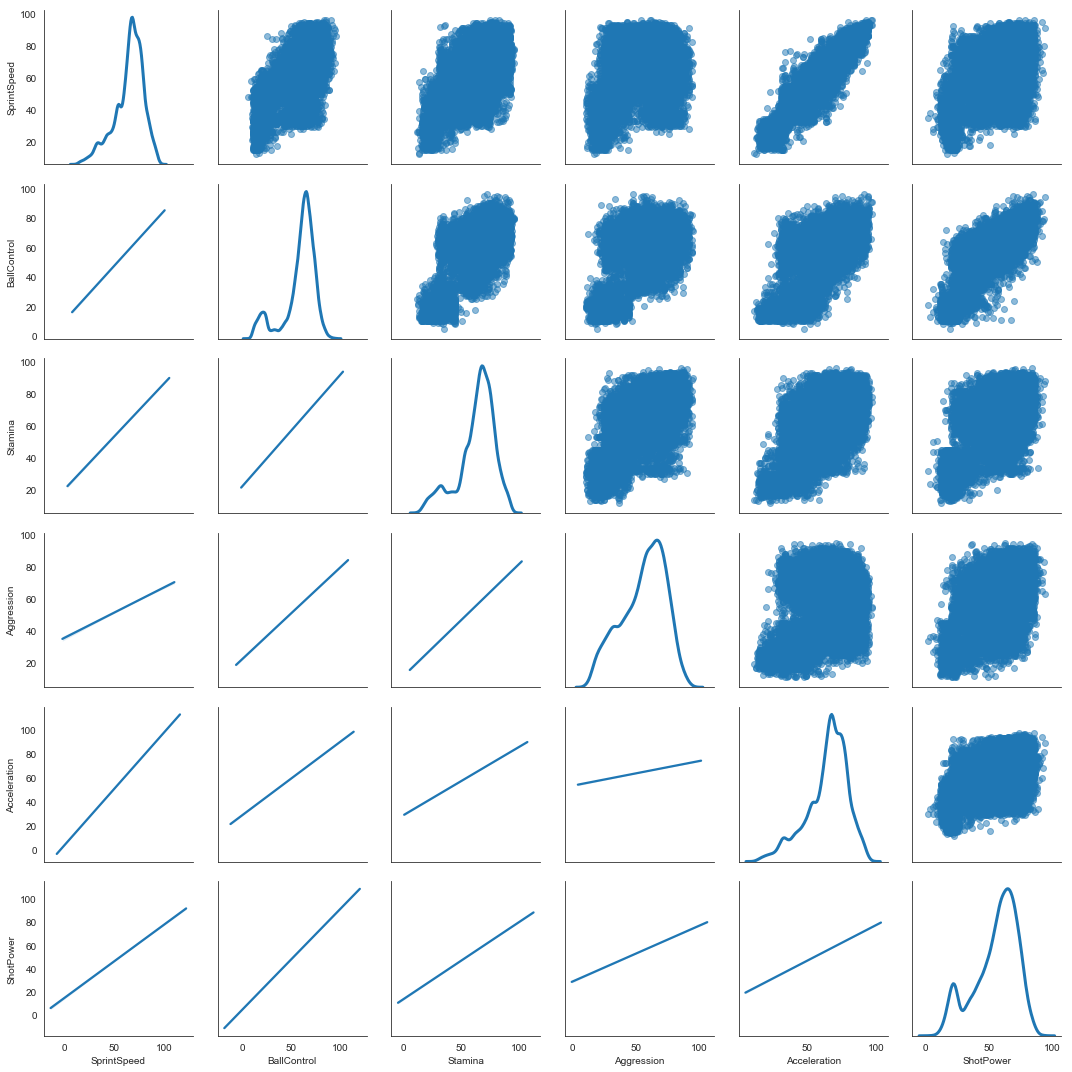

In [10]:
# declare that I want to make a scatterplot matrix
_ = sns.PairGrid(df_jittered.dropna(), diag_sharey = False)

# Scatter plot
_.map_upper(plt.scatter, alpha = 0.5)

# Linear relationship of two variables
_.map_lower(sns.regplot, scatter_kws = dict(alpha = 0))

# Add kernel density distribution of single variable (univariate distribution)
_.map_diag(sns.kdeplot, lw = 3)
plt.show

As we can see, correlation between the BallControl and ShotPower of players is highly positive. The same we can say about SprintSpeed, Acceleration. Aggression and Acceleration have moderate positive correlation. Here I also can conclude that the players with high aggression feel more confident with BallControl and have powerful shots.

                   Age   Overall    Height    Weight   Balance  SprintSpeed  \
Age           1.000000  0.453252  0.053003  0.229824 -0.089610    -0.150996   
Overall       0.453252  1.000000  0.040659  0.154095  0.103947     0.211919   
Height        0.053003  0.040659  1.000000  0.452011 -0.494588    -0.327255   
Weight        0.229824  0.154095  0.452011  1.000000 -0.663470    -0.410845   
Balance      -0.089610  0.103947 -0.494588 -0.663470  1.000000     0.643324   
SprintSpeed  -0.150996  0.211919 -0.327255 -0.410845  0.643324     1.000000   
BallControl   0.086686  0.462366 -0.311966 -0.337373  0.601243     0.663681   
Stamina       0.099725  0.367111 -0.237037 -0.221977  0.474412     0.619422   
Aggression    0.267105  0.396719 -0.068991  0.031847  0.185469     0.278254   
Acceleration -0.158441  0.197856 -0.380982 -0.477980  0.711624     0.921814   
ShotPower     0.158509  0.443220 -0.226905 -0.190664  0.458065     0.544480   
Agility      -0.018353  0.266363 -0.409310 -0.534680

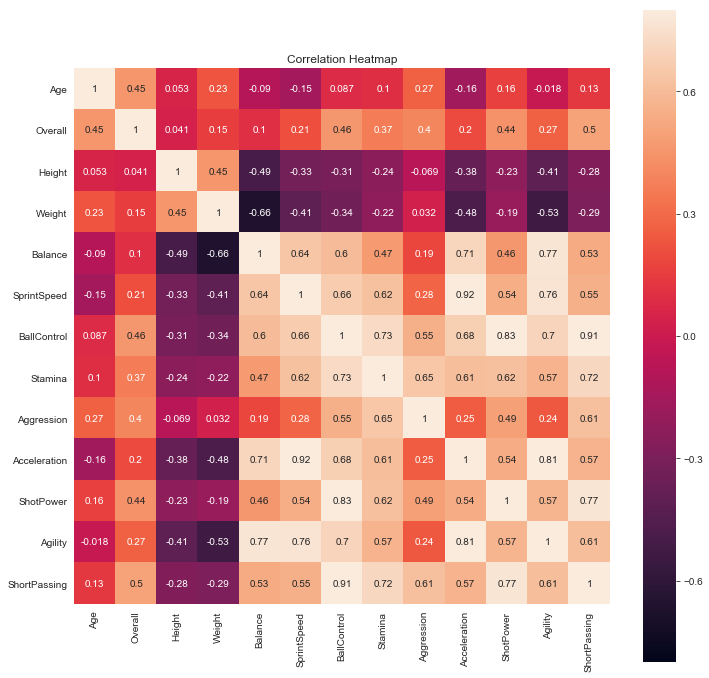

In [11]:
# let's make correlation matrix
df1_corr = df1.corr()
print(df1_corr)

# Plot heatmap of correlations
fig, ax = plt.subplots(figsize = (12,12))
_ = sns.heatmap(df1_corr, square = True, annot = True, vmin = -0.8, vmax = 0.8)
_.set(title = 'Correlation Heatmap')
plt.show()

Highest correlation is between SprintSpeed and Acceleration
### 1.3.2 For a continuous and a categorical pair:
Boxplots are very useful and informative for visualisation of the continuous variable for each value of the categorical variable. 

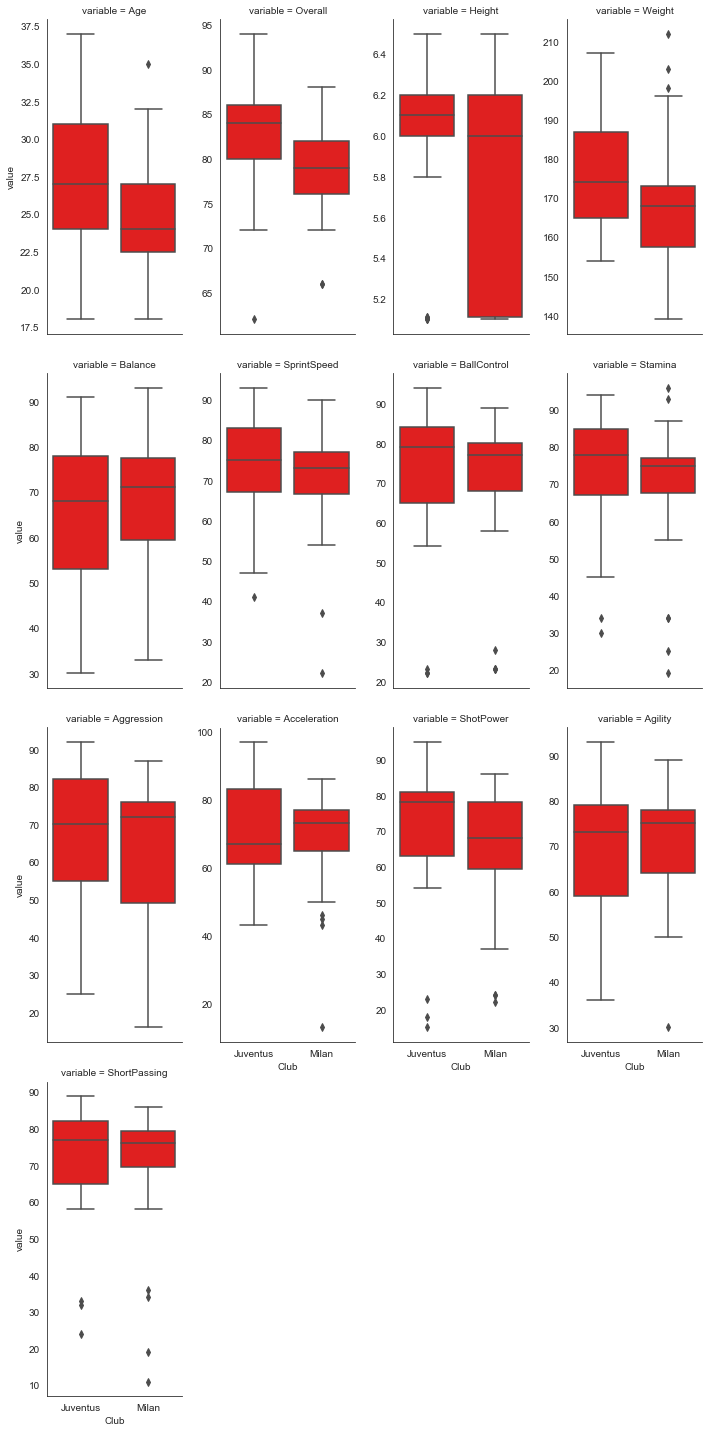

In [12]:
# restructure the data so we can use FacetGrid. I'll take only two clubs from Seria A 

df_miljuve = df1.loc[(df1['Club']=='Milan')|(df1['Club']=='Juventus'),:]
df_rest = pd.melt(df_miljuve, id_vars = ['Club', 'Nationality', 'Position', 'Body Type'])
df_rest['value'] = df_rest['value'].astype(float)

_ = sns.FacetGrid(df_rest, col = 'variable', size = 5, aspect = 0.5, col_wrap=4, sharey = False)
_ = _.map(sns.boxplot, 'Club', 'value', color = 'r')
plt.show()

Generally speaking, we have outliers in each group. Judging by the boxplots, Milan's staff is younger, and less experienced. Milan has adventages over Juventus only in 3 categories: Balance, Aggression and Acceleration 

In [13]:
# descriptive statistics fro each Club
print(df_miljuve.groupby('Club').describe().stack(1))

# Test group differences significance
for col in df_miljuve.loc[:,'Age':'ShotPower']:
    print(col)
    print(sts.ttest_ind(df_miljuve[df_miljuve['Club']=='Juventus'][col],
                       df_miljuve[df_miljuve['Club']=='Milan'][col]))

                Acceleration        Age  Aggression    Agility    Balance  \
Club                                                                        
Juventus count     25.000000  25.000000   25.000000  25.000000  25.000000   
         mean      70.560000  27.160000   66.680000  70.160000  64.880000   
         std       14.157095   4.642916   18.343300  14.741325  15.053571   
         min       43.000000  18.000000   25.000000  36.000000  30.000000   
         25%       61.000000  24.000000   55.000000  59.000000  53.000000   
         50%       67.000000  27.000000   70.000000  73.000000  68.000000   
         75%       83.000000  31.000000   82.000000  79.000000  78.000000   
         max       97.000000  37.000000   92.000000  93.000000  91.000000   
Milan    count     27.000000  27.000000   27.000000  27.000000  27.000000   
         mean      67.481481  25.000000   61.666667  70.555556  67.925926   
         std       15.940684   4.113767   21.773308  13.153921  15.337049   

### 1.3.3 For two categorical variables:
As a second categorical variable I'll use Postion. Using barplots I'll compare total count of both clubs' players by their positions in the field

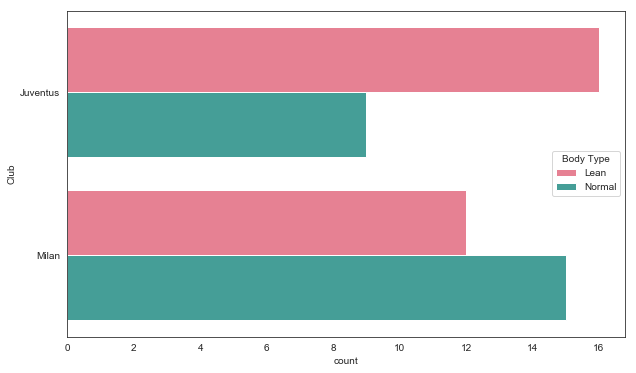

Body Type  Lean  Normal
Club                   
Juventus     16       9
Milan        12      15
Power_divergenceResult(statistic=2.3076923076923075, pvalue=0.5110488670165061)


In [14]:
# plot counts for each combination of levels
fig, ax = plt.subplots(figsize = (10,6))
_ = sns.countplot(y = 'Club', hue = 'Body Type', data = df_miljuve, palette = 'husl')
plt.show()

# table of counts
counttable = pd.crosstab(df_miljuve['Club'], df_miljuve['Body Type'])
print(counttable)

# chi-square test statistic
print(sts.chisquare(counttable, axis = None))

# 2. Feature Engineering
## 2.1 Making new indicator variable
I'll make a new 'Champions' indicator that tells us if a row has data from the all time world football champion nationalities.

In [15]:
df1.Nationality.unique()

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

In [16]:
# creating a data frame to hold my features.
features = pd.get_dummies(df1['Nationality'])

# Champion nationalities dummy
features['Champions'] = np.where((df1['Nationality'].isin(['Argentina', 'Brazil', 'Italy', 'Germany', 'France',
                                                                    'England', 'Spain', 'Urugvay'])), 1, 0)
# Which non-Champion nationality clubs have more players from Champion nationalities
pd.crosstab(features['Champions'], df1['Club']).stack()[0].sort_values(ascending = False).head(20)

Club
De Graafschap                 30
AZ Alkmaar                    29
FC Emmen                      29
Guadalajara                   29
Júbilo Iwata                  29
Shonan Bellmare               29
Puebla FC                     29
Yokohama F. Marinos           29
Sagan Tosu                    29
Club León                     28
Cerezo Osaka                  28
Deportes Tolima               28
Sangju Sangmu FC              28
Al Raed                       28
Club Necaxa                   28
Club Atlas                    28
Hokkaido Consadole Sapporo    28
Houston Dynamo                28
Gamba Osaka                   28
Independiente Santa Fe        28
dtype: int64

Japanese, Mexican and Holland clubs have more players from Champion nationalities than other countries. 

## 2.2 Changing variable types
Here I'll take "Age" continuous variable and make it categorical to compare older players to younger ones.  Usually, a football player is at its peak between 24-29 years of age and usually plays at International level till the age of 34-36. I'll take 29 as a threshold.

In [17]:
# Players older than 29 years
features['OldPlayers'] = np.where((df1['Age']>29), 1, 0)
print(df1['Age'].groupby(features['OldPlayers']).describe())

              count       mean       std   min   25%   50%   75%   max
OldPlayers                                                            
0           14480.0  23.415815  3.325633  16.0  21.0  23.0  26.0  29.0
1            3438.0  32.220768  2.165500  30.0  30.0  32.0  34.0  45.0


## 2.2 Combining highly-correlated variables
If we check before plotted correlation matrix of variables in our dataset, we can see the most highly-correlated features of players. I'll combine using a statistical method called Principal Components Analysis ("PCA") that reduces the correlated set of variables into a smaller set of uncorrelated features. PCA works best with normally-distributed data and assumes the relatioships among variables are linear. High correlations result in components that are unstable and change a lot in response to very small changes in data. That's a reason why I choose **moderately strongly correlated variables**.
I'll create 5 new features from 11 available continuous variables.


**1. Stam_Agil** <br>
**2. Accel_Shot** <br>
**3. Agg_Ball** <br>
**4. Speed_Balance** <br>
**5. Short_Overall** <br>

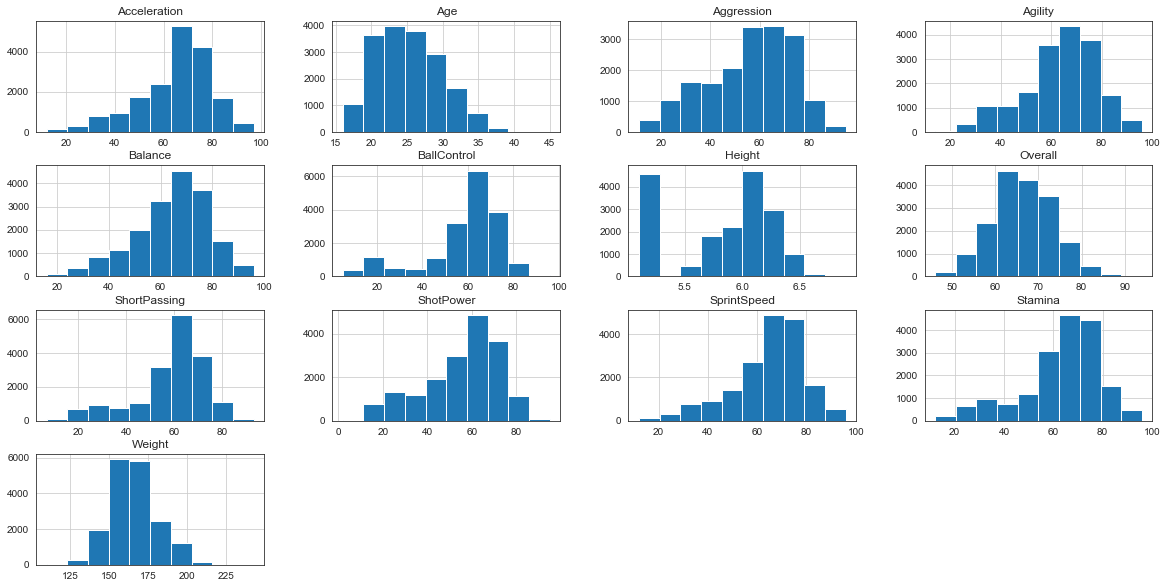

In [18]:
# dealing with non-normality
df1.hist(figsize = (20, 10))
plt.show()

Pretty much all features look normally distributed, except Height. I'll not use this

In [19]:
# Stamina & Agility
means_1 = df1[['Stamina','Agility']].mean(axis=0)
stds_1 = df[['Stamina', 'Agility']].std(axis=0)
features['Stam_Agil'] = ((df1[['Stamina','Agility']] - means_1) / stds_1).mean(axis=1)

# Aggression & BallControl
means_2 = df1[['Aggression','BallControl']].mean(axis=0)
stds_2 = df1[['Aggression', 'BallControl']].std(axis=0)
features['Agg_Ball'] = ((df1[['Aggression','BallControl']] - means_2) / stds_2).mean(axis=1)

# Acceleration & ShotPower
means_3 = df1[['Acceleration','ShotPower']].mean(axis=0)
stds_3 = df1[['Acceleration','ShotPower']].std(axis=0)
features['Accel_Shot'] = ((df1[['Acceleration','ShotPower']] - means_3) / stds_3).mean(axis=1)


# Acceleration & ShotPower
means_4 = df1[['SprintSpeed','Balance']].mean(axis=0)
stds_4 = df1[['SprintSpeed','Balance']].std(axis=0)
features['Speed_Balance'] = ((df1[['SprintSpeed','Balance']] - means_4) / stds_4).mean(axis=1)

# Acceleration & ShotPower
means_5 = df1[['ShortPassing','Overall']].mean(axis=0)
stds_5 = df1[['ShortPassing','Overall']].std(axis=0)
features['Short_Overall'] = ((df1[['ShortPassing','Overall']] - means_5) / stds_5).mean(axis=1)

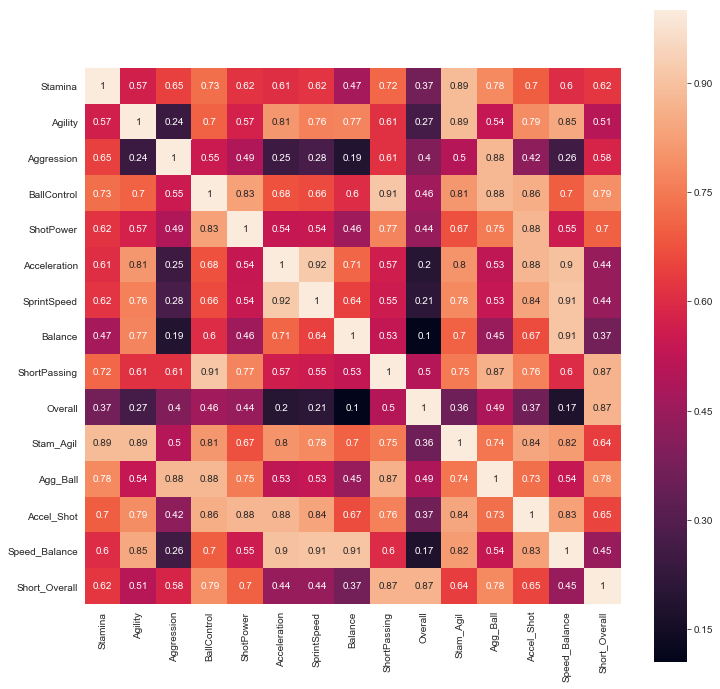

In [21]:
# how well the compositions correlate with each of the individual variables.
plotdf = df1.loc[:, ['Stamina', 'Agility', 'Aggression','BallControl', 'ShotPower', 'Acceleration', 'SprintSpeed',
                    'Balance', 'ShortPassing', 'Overall']]


plotdf['Stam_Agil'] = features['Stam_Agil']
plotdf['Agg_Ball'] = features['Agg_Ball']
plotdf['Accel_Shot'] = features['Accel_Shot']
plotdf['Speed_Balance'] = features['Speed_Balance']
plotdf['Short_Overall'] = features['Short_Overall']

# plot heatmap
# print correlations
corrmat = plotdf.corr()
fig, ax = plt.subplots(figsize = (12,12))
_ = sns.heatmap(corrmat, square = True, annot = True)
plt.show()

